In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, roc_auc_score
from itertools import cycle

# Load Dataset

In [2]:
dataset = pd.read_csv("../data/ABT_1_ravdess.csv")

In [3]:
display(dataset.head())
dataset.shape

,modality,vocal_channel,intensity,statement,repetition,actor,emotion,gender,loudness_db,y_0,...,y_89986,y_89987,y_89988,y_89989,y_89990,y_89991,y_89992,y_89993,y_89994,y_89995
0,3,1,1,2,1,16,angry,Female,-64.729790,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,1,2,2,16,fearful,Female,-65.943780,2.051093e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,2,1,2,16,fearful,Female,-51.392780,-8.404510e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,1,1,16,angry,Female,-59.114307,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,1,1,1,16,disgust,Female,-69.102135,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1440, 90005)

## Train Test Split

In [4]:
y = dataset["emotion"].copy()

In [5]:
col = ["emotion"]
X = dataset.copy().drop(columns=col)

In [6]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Columns: 90004 entries, modality to y_89995
dtypes: float64(89997), int64(6), object(1)
memory usage: 988.8+ MB


In [7]:
# Encode gender column: Male = 1, Female = 0
X['gender'] = X['gender'].map({'Male': 1, 'Female': 0})
X.head()

,modality,vocal_channel,intensity,statement,repetition,actor,gender,loudness_db,y_0,y_1,...,y_89986,y_89987,y_89988,y_89989,y_89990,y_89991,y_89992,y_89993,y_89994,y_89995
0,3,1,1,2,1,16,0,-64.729790,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,1,2,2,16,0,-65.943780,2.051093e-08,-1.459523e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,2,1,2,16,0,-51.392780,-8.404510e-06,-3.401929e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,1,1,16,0,-59.114307,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,1,1,1,16,0,-69.102135,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
len(y_test)

432

# Baseline SVM Model

In [10]:
# Create SVM pipeline with StandardScaler
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Train the model
svm_pipeline.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [11]:
# Make predictions
y_pred = svm_pipeline.predict(X_test)

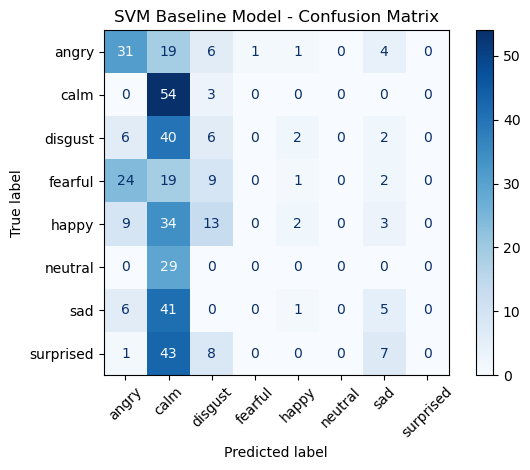

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_pipeline.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('SVM Baseline Model - Confusion Matrix')
plt.tight_layout()

# Save plot
import os
os.makedirs('../output/EDA_plots', exist_ok=True)
plt.savefig('../output/EDA_plots/13_preliminary_svm_confusion_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

In [13]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       angry       0.40      0.50      0.45        62
        calm       0.19      0.95      0.32        57
     disgust       0.13      0.11      0.12        56
     fearful       0.00      0.00      0.00        55
       happy       0.29      0.03      0.06        61
     neutral       0.00      0.00      0.00        29
         sad       0.22      0.09      0.13        53
   surprised       0.00      0.00      0.00        59

    accuracy                           0.23       432
   macro avg       0.15      0.21      0.13       432
weighted avg       0.17      0.23      0.15       432



c:\Users\Nico\miniconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nico\miniconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nico\miniconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [14]:
# Calculate accuracy
train_score = svm_pipeline.score(X_train, y_train)
test_score = svm_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

Training Accuracy: 0.4067
Testing Accuracy: 0.2269


# Logistic Regression Model

In [15]:
# Create Logistic Regression pipeline with StandardScaler
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))

# Train the model
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print(f"Training completed")

Training Logistic Regression model...
Training completed


In [16]:
# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)

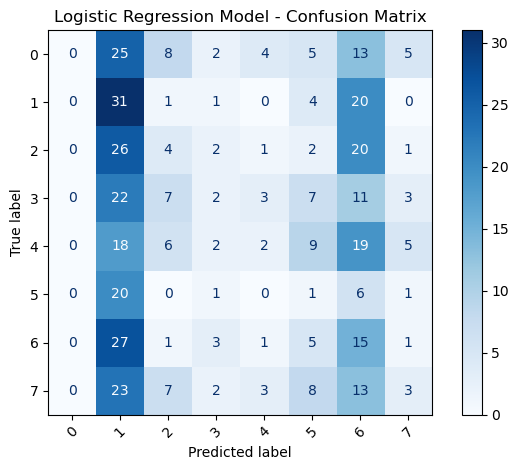

In [17]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues', xticks_rotation=45)
plt.title('Logistic Regression Model - Confusion Matrix')
plt.tight_layout()

# Save plot
import os
os.makedirs('../output/EDA_plots', exist_ok=True)
plt.savefig('../output/EDA_plots/14_preliminary_logistic_regression_confusion_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

In [18]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        62
        calm       0.16      0.54      0.25        57
     disgust       0.12      0.07      0.09        56
     fearful       0.13      0.04      0.06        55
       happy       0.14      0.03      0.05        61
     neutral       0.02      0.03      0.03        29
         sad       0.13      0.28      0.18        53
   surprised       0.16      0.05      0.08        59

    accuracy                           0.13       432
   macro avg       0.11      0.13      0.09       432
weighted avg       0.11      0.13      0.09       432



c:\Users\Nico\miniconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nico\miniconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nico\miniconda3\envs\pytorch-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [19]:
# Calculate accuracy
train_score_lr = lr_pipeline.score(X_train, y_train)
test_score_lr = lr_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_score_lr:.4f}")
print(f"Testing Accuracy: {test_score_lr:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.1343


# Random Forest

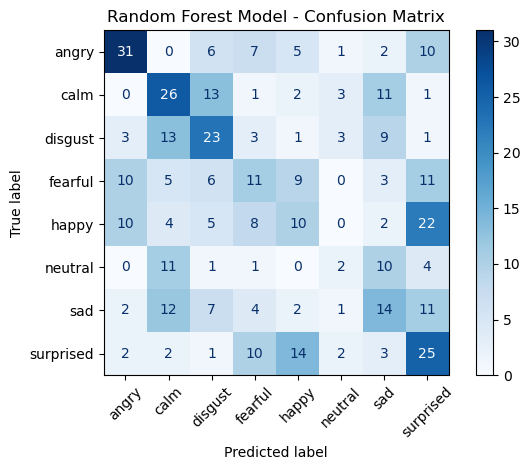

Classification Report:
              precision    recall  f1-score   support

       angry       0.53      0.50      0.52        62
        calm       0.36      0.46      0.40        57
     disgust       0.37      0.41      0.39        56
     fearful       0.24      0.20      0.22        55
       happy       0.23      0.16      0.19        61
     neutral       0.17      0.07      0.10        29
         sad       0.26      0.26      0.26        53
   surprised       0.29      0.42      0.35        59

    accuracy                           0.33       432
   macro avg       0.31      0.31      0.30       432
weighted avg       0.32      0.33      0.32       432

Training Accuracy: 1.0000
Testing Accuracy: 0.3287


In [20]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
# Train the model

rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
      display_labels=rf_pipeline.classes_)
disp_rf.plot(cmap='Blues', xticks_rotation=45)
plt.title('Random Forest Model - Confusion Matrix')
plt.tight_layout()

# Save plot
import os
os.makedirs('../output/EDA_plots', exist_ok=True)
plt.savefig('../output/EDA_plots/15_preliminary_random_forest_confusion_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate accuracy
train_score_rf = rf_pipeline.score(X_train, y_train)
test_score_rf = rf_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_score_rf:.4f}")
print(f"Testing Accuracy: {test_score_rf:.4f}")

# Gradient Boosting Classifier

In [21]:
# Very lightweight GBC for high-dimensional data and limited resources
gb_pipeline = make_pipeline(
    StandardScaler(), 
    GradientBoostingClassifier(
        n_estimators=50,      # Drastically reduced for speed
        max_depth=3,          # Very shallow trees
        learning_rate=0.1,    # Higher learning rate to compensate for fewer estimators
        subsample=1,        # Use only 80% of samples per tree
        max_features='sqrt',  # Use sqrt of features instead of all 89K
        verbose=1,            # Show progress during training
        random_state=42
    )
)

# Train the model
gb_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.9509           32.96s
         2           1.8535           30.97s
         3           1.7677           32.23s
         4           1.6901           31.17s
         5           1.6141           29.96s
         6           1.5502           28.91s
         7           1.4880           28.01s
         8           1.4285           27.25s
         9           1.3777           26.56s
        10           1.3286           25.93s
        20           0.9221           19.80s
        30           0.6383           13.05s
        40           0.4438            6.51s
        50           0.3019            0.00s


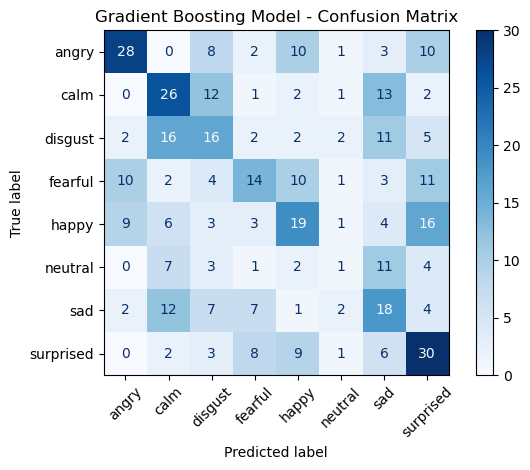

Classification Report:
              precision    recall  f1-score   support

       angry       0.55      0.45      0.50        62
        calm       0.37      0.46      0.41        57
     disgust       0.29      0.29      0.29        56
     fearful       0.37      0.25      0.30        55
       happy       0.35      0.31      0.33        61
     neutral       0.10      0.03      0.05        29
         sad       0.26      0.34      0.30        53
   surprised       0.37      0.51      0.43        59

    accuracy                           0.35       432
   macro avg       0.33      0.33      0.32       432
weighted avg       0.35      0.35      0.34       432

Training Accuracy: 0.9960
Testing Accuracy: 0.3519


In [22]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb_pipeline.classes_)
disp_gb.plot(cmap='Blues', xticks_rotation=45)
plt.title('Gradient Boosting Model - Confusion Matrix')
plt.tight_layout()

# Save plot
import os
os.makedirs('../output/EDA_plots', exist_ok=True)
plt.savefig('../output/EDA_plots/16_preliminary_gradient_boosting_confusion_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Calculate accuracy
train_score_gb = gb_pipeline.score(X_train, y_train)
test_score_gb = gb_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_score_gb:.4f}")
print(f"Testing Accuracy: {test_score_gb:.4f}")

# ROC-AUC Analysis for Baseline Models

Multi-class ROC curves using One-vs-Rest approach for all 8 emotion classes.

In [23]:
# Get class labels and binarize the output
classes = sorted(y_test.unique())
n_classes = len(classes)

# Binarize the test labels for ROC computation
y_test_bin = label_binarize(y_test, classes=classes)

print(f"Number of classes: {n_classes}")
print(f"Classes: {classes}")

Number of classes: 8
Classes: ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [24]:
# Get probability predictions for each model
# Note: SVM with default kernel doesn't have predict_proba, need to use decision_function

# For SVM, use decision_function
y_score_svm = svm_pipeline.decision_function(X_test)

# For Logistic Regression, Random Forest, and GBC, use predict_proba
y_score_lr = lr_pipeline.predict_proba(X_test)
y_score_rf = rf_pipeline.predict_proba(X_test)
y_score_gb = gb_pipeline.predict_proba(X_test)

print("Prediction scores obtained for all models")

Prediction scores obtained for all models


In [25]:
# Function to compute ROC curve and AUC for each class
def compute_roc_auc(y_true_bin, y_score, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    return fpr, tpr, roc_auc

# Compute ROC curves for all models
fpr_svm, tpr_svm, roc_auc_svm = compute_roc_auc(y_test_bin, y_score_svm, n_classes)
fpr_lr, tpr_lr, roc_auc_lr = compute_roc_auc(y_test_bin, y_score_lr, n_classes)
fpr_rf, tpr_rf, roc_auc_rf = compute_roc_auc(y_test_bin, y_score_rf, n_classes)
fpr_gb, tpr_gb, roc_auc_gb = compute_roc_auc(y_test_bin, y_score_gb, n_classes)

print("ROC curves computed for all models")

ROC curves computed for all models


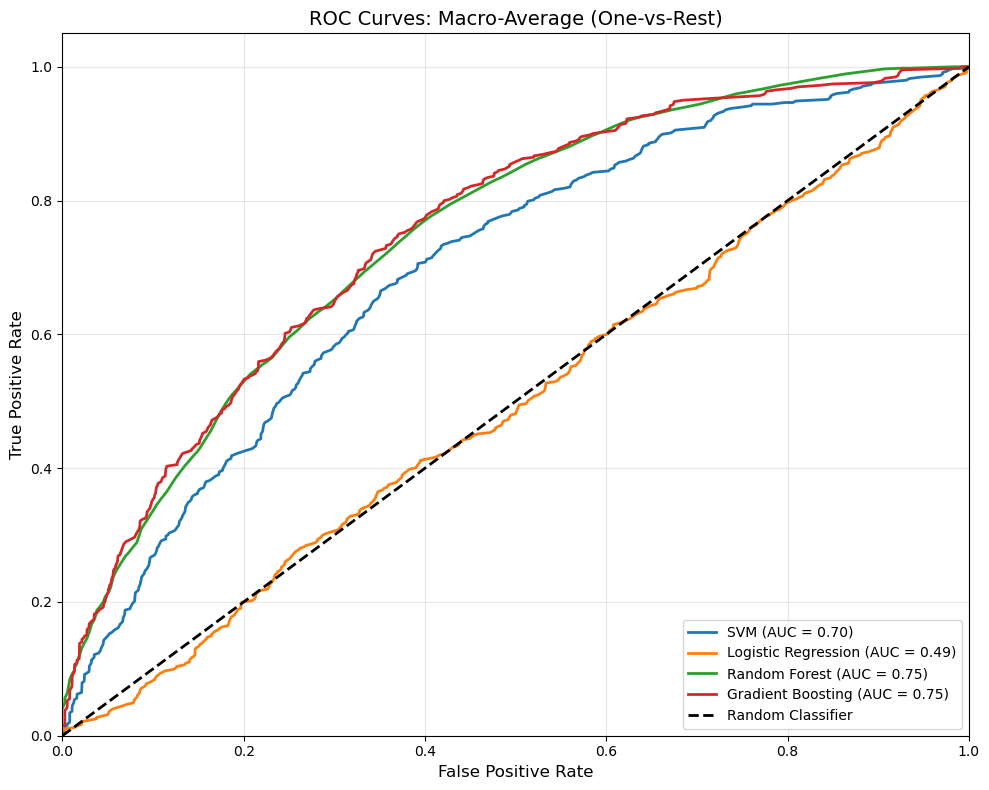

Macro-Average AUC Scores:
SVM: 0.6991
Logistic Regression: 0.4941
Random Forest: 0.7505
Gradient Boosting: 0.7526


In [26]:
# Plot macro-average ROC curves for all models
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm["macro"], tpr_svm["macro"],
         label=f'SVM (AUC = {roc_auc_svm["macro"]:.2f})',
         linewidth=2)

plt.plot(fpr_lr["macro"], tpr_lr["macro"],
         label=f'Logistic Regression (AUC = {roc_auc_lr["macro"]:.2f})',
         linewidth=2)

plt.plot(fpr_rf["macro"], tpr_rf["macro"],
         label=f'Random Forest (AUC = {roc_auc_rf["macro"]:.2f})',
         linewidth=2)

plt.plot(fpr_gb["macro"], tpr_gb["macro"],
         label=f'Gradient Boosting (AUC = {roc_auc_gb["macro"]:.2f})',
         linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: Macro-Average (One-vs-Rest)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save plot
import os
os.makedirs('../output/EDA_plots', exist_ok=True)
plt.savefig('../output/EDA_plots/17_preliminary_roc_curves_all_models.png', dpi=300, bbox_inches='tight')

plt.show()

# Print AUC scores
print("Macro-Average AUC Scores:")
print(f"SVM: {roc_auc_svm['macro']:.4f}")
print(f"Logistic Regression: {roc_auc_lr['macro']:.4f}")
print(f"Random Forest: {roc_auc_rf['macro']:.4f}")
print(f"Gradient Boosting: {roc_auc_gb['macro']:.4f}")

# Model Comparison: Performance and Overfitting Analysis

Comprehensive comparison of all 4 baseline models showing test accuracy and overfitting gaps.

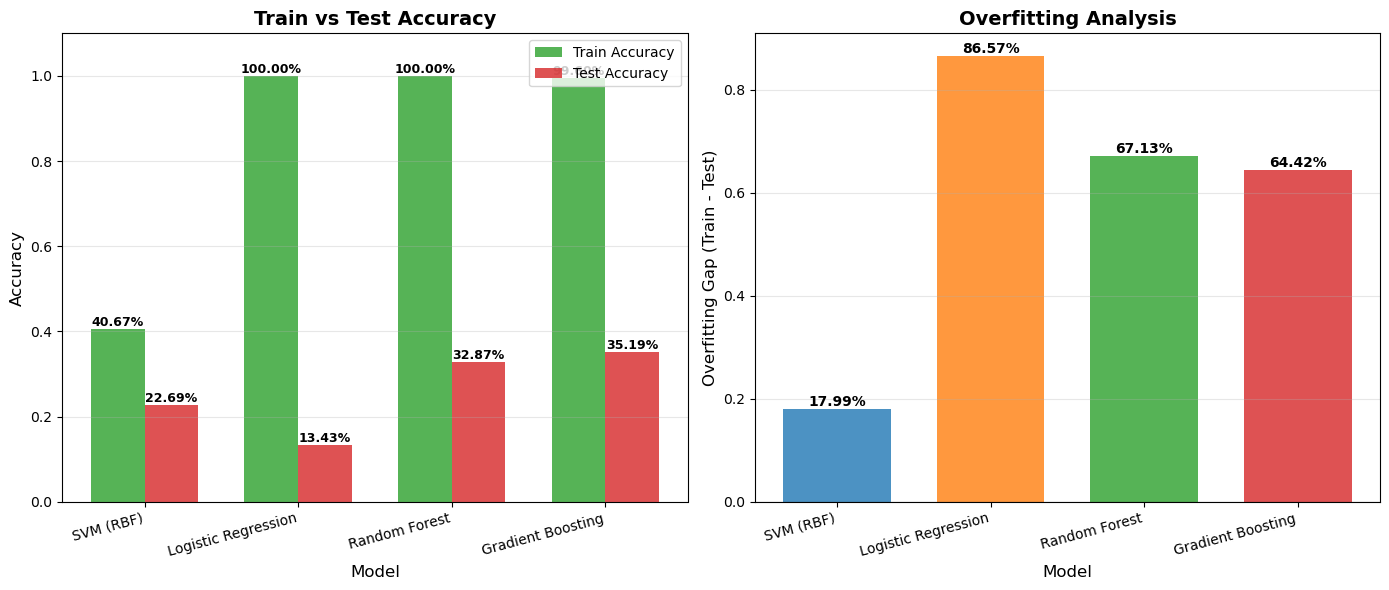

In [27]:
# Create comparison dataframe
comparison_data = {
    'Model': [
        'SVM (RBF)',
        'Logistic Regression',
        'Random Forest',
        'Gradient Boosting'
    ],
    'Train Accuracy': [
        train_score,
        train_score_lr,
        train_score_rf,
        train_score_gb
    ],
    'Test Accuracy': [
        test_score,
        test_score_lr,
        test_score_rf,
        test_score_gb
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Overfitting Gap'] = comparison_df['Train Accuracy'] - comparison_df['Test Accuracy']

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Train vs Test Accuracy Comparison
models = comparison_df['Model']
train_scores = comparison_df['Train Accuracy']
test_scores = comparison_df['Test Accuracy']

x = np.arange(len(models))
width = 0.35

bars1 = axes[0].bar(x - width/2, train_scores, width, alpha=0.8, label='Train Accuracy', color='#2ca02c')
bars2 = axes[0].bar(x + width/2, test_scores, width, alpha=0.8, label='Test Accuracy', color='#d62728')

axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Train vs Test Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=15, ha='right')
axes[0].legend(loc='upper right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.1])

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 2: Overfitting Analysis
overfitting_gaps = comparison_df['Overfitting Gap']

bars3 = axes[1].bar(x, overfitting_gaps, width*2, alpha=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('Overfitting Gap (Train - Test)', fontsize=12)
axes[1].set_title('Overfitting Analysis', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=15, ha='right')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, gap in zip(bars3, overfitting_gaps):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{gap:.2%}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add horizontal line at y=0
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

plt.tight_layout()

# Save plot
import os
os.makedirs('../output/EDA_plots', exist_ok=True)
plt.savefig('../output/EDA_plots/18_preliminary_model_comparison.png', dpi=300, bbox_inches='tight')

plt.show()